In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/430/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/5/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/5/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/5'}},
  'code': 'FCB',
  'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
  'name': 'FC Bayern München',
  'shortName': 'Bayern',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/12/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/12/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/12'}},
  'code': 'SVW',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/commons/b/be/SV-Werder-Bremen-Logo.svg',
  'name': 'Werder Bremen',
  'shortName': 'Bremen',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/16/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/1

In [108]:
team_for_pd = []
team_dict = {}
for team in teams:
    cost = call_api(team['_links']['self']['href'], 'squadMarketValue')
    if not cost:
        cost = np.random.randint(10000000, 500000000)  
#     print(cost)
#     print(team['name'])
    team_for_pd.append({'name': team['name'], 'cost': cost, 'count_win': 0})

    
team_for_pd.append({'name': 'SpVgg Greuther Fürth', 'cost': 140000000, 'count_win': 0})     
team_for_pd.append({'name': 'Dynamo Dresden', 'cost': 190000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Holstein Kiel', 'cost': 120000000, 'count_win': 0})      
team_for_pd.append({'name': 'Fortuna Düsseldorf', 'cost': 180000000, 'count_win': 0})     
team_for_pd.append({'name': '1. FC Nürnberg', 'cost': 280000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Arminia Bielefeld', 'cost': 270000000, 'count_win': 0})     
team_for_pd.append({'name': 'FC St. Pauli', 'cost': 130000000, 'count_win': 0})     
team_for_pd.append({'name': 'SC Paderborn 07', 'cost': 130000000, 'count_win': 0})    
team_for_pd.append({'name': '1. FC Kaiserslautern', 'cost': 230000000, 'count_win': 0})    
team_for_pd.append({'name': '1. FC Kaiserslautern', 'cost': 230000000, 'count_win': 0})
team_for_pd.append({'name': 'Eintracht Braunschweig', 'cost': 190000000, 'count_win': 0})
team_for_pd.append({'name': 'VfL Bochum', 'cost': 120000000, 'count_win': 0})
team_for_pd.append({'name': 'MSV Duisburg', 'cost': 120000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Erzgebirge Aue', 'cost': 140000000, 'count_win': 0})       
team_for_pd.append({'name': 'Jahn Regensburg', 'cost': 140000000, 'count_win': 0})      
team_for_pd.append({'name': 'SV Sandhausen', 'cost': 240000000, 'count_win': 0})      
team_for_pd.append({'name': '1. FC Union Berlin', 'cost': 160000000, 'count_win': 0})    
team_for_pd.append({'name': 'VfL Osnabrück', 'cost': 160000000, 'count_win': 0})
team_for_pd.append({'name': 'Tottenham Hotspur FC', 'cost': 170000000, 'count_win': 0})
team_for_pd.append({'name': '1. FC Magdeburg', 'cost': 170000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Hannover 96', 'cost': 220000000, 'count_win': 0})    
team_for_pd.append({'name': 'VfB Stuttgart', 'cost': 210000000, 'count_win': 0})
team_for_pd.append({'name': 'Paris Saint-Germain', 'cost': 200000000, 'count_win': 0})
team_for_pd.append({'name': 'Real Madrid CF', 'cost': 350000000, 'count_win': 0})
team_for_pd.append({'name': 'Sevilla FC', 'cost': 180000000, 'count_win': 0})

team_for_pd = pd.DataFrame(team_for_pd)
team_for_pd.set_index('name', inplace=True)

                        
# teams_set = set()
# for team in teams:
#     fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
#     teams_set.add(team['name'])
    

# teams_set.add('Paris Saint-Germain')
# teams_dict = dict.fromkeys(teams_set, int(0))
# print(teams_dict)

    
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    for f in fixtures:
        result_home = 0
        result_home += f['result']['goalsHomeTeam']
        t = f['result'].get('halfTime',0)
        if t:
            result_home += f['result']['halfTime']['goalsHomeTeam']
            t = f['result']['halfTime'].get('extraTime',0)
            if t:
                result_home += f['result']['halfTime']['extraTime']['goalsHomeTeam']
                t = f['result']['halfTime']['extraTime'].get('penaltyShootout',0)
                if t:
                    result_home += f['result']['halfTime']['extraTime']['penaltyShootout']['goalsHomeTeam']
                        
        result_away = 0
        result_away += f['result']['goalsAwayTeam']
        t = f['result'].get('halfTime',0)
        if t:
            result_away += f['result']['halfTime']['goalsAwayTeam']
            t = f['result']['halfTime'].get('extraTime',0)
            if t:
                result_away += f['result']['halfTime']['extraTime']['goalsAwayTeam']
                t = f['result']['halfTime']['extraTime'].get('penaltyShootout',0)
                if t:
                    result_away += f['result']['halfTime']['extraTime']['penaltyShootout']['goalsAwayTeam']                
        if (result_home > result_away):
#             print('Win  {}'.format(f['homeTeamName'])) 
            team_for_pd.loc[f['homeTeamName']]['count_win'] += 1
        else:
#             print('Win  {}'.format(f['awayTeamName']))
            team_for_pd.loc[f['awayTeamName']]['count_win'] += 1
            
        
team_for_pd   
        
        

{'error': 'You reached your request limit. Wait 18 seconds.'}


TypeError: 'NoneType' object is not iterable

TypeError: list indices must be integers or slices, not str

In [109]:

team_for_pd

,cost,count_win
name,,
FC Bayern München,286639676,45
Werder Bremen,188529493,17
FC Augsburg,352025811,1
VfL Wolfsburg,427108536,1
Borussia Dortmund,360191241,1
1. FSV Mainz 05,351079939,0
Eintracht Frankfurt,140705027,2
FC Schalke 04,347027796,1
Hamburger SV,257607026,0


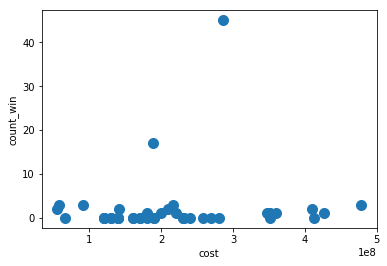

In [110]:
team_for_pd.plot.scatter(x='cost', y='count_win', s=100)

In [113]:
whitened = whiten(team_for_pd.as_matrix())
whitened

array([[ 2.7486803 ,  6.31187846],
       [ 1.80787012,  2.38448742],
       [ 3.37568904,  0.14026397],
       [ 4.09568151,  0.14026397],
       [ 3.45398998,  0.14026397],
       [ 3.36661877,  0.        ],
       [ 1.34926589,  0.28052793],
       [ 3.32776146,  0.14026397],
       [ 2.47027686,  0.        ],
       [ 3.95624802,  0.        ],
       [ 0.63267913,  0.        ],
       [ 2.22069438,  0.        ],
       [ 2.07804271,  0.4207919 ],
       [ 4.59171131,  0.4207919 ],
       [ 0.54632407,  0.4207919 ],
       [ 3.92909683,  0.28052793],
       [ 0.8692491 ,  0.4207919 ],
       [ 0.52462596,  0.28052793],
       [ 1.34250515,  0.        ],
       [ 1.82197128,  0.        ],
       [ 1.1507187 ,  0.        ],
       [ 1.72607806,  0.        ],
       [ 2.68501031,  0.        ],
       [ 2.58911708,  0.        ],
       [ 1.24661193,  0.        ],
       [ 1.24661193,  0.        ],
       [ 2.20554418,  0.        ],
       [ 2.20554418,  0.        ],
       [ 1.82197128,

In [114]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 2.27827521,  4.34818294],
        [ 3.52065338,  0.1275127 ],
        [ 1.56143014,  0.08415838]]),
 array([0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]))

In [115]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'g',
 'g',
 'g',
 'g',
 'b',
 'g',
 'b',
 'g',
 'b',
 'b',
 'b',
 'g',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'b']

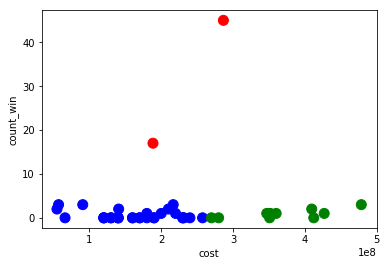

In [118]:
team_for_pd.plot.scatter(x='cost', y='count_win', c=colors, s=100)

In [119]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 1.40688469,  0.02805279],
        [ 0.64321957,  0.28052793],
        [ 3.45541911,  0.91809141],
        [ 2.18776022,  0.07552675],
        [ 0.67899456, -1.87016649]]),
 array([2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 1, 3, 3, 2, 1, 2, 1, 1, 0, 3, 0, 0, 3,
        3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 2, 0]))

In [120]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'y',
 'b',
 'g',
 'y',
 'y',
 'b',
 'g',
 'b',
 'g',
 'g',
 'r',
 'y',
 'r',
 'r',
 'y',
 'y',
 'r',
 'r',
 'y',
 'y',
 'y',
 'r',
 'r',
 'r',
 'r',
 'y',
 'r',
 'r',
 'r',
 'r',
 'y',
 'y',
 'y',
 'b',
 'r']

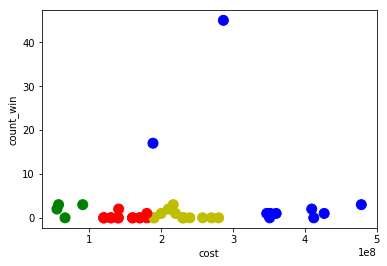

In [123]:
team_for_pd.plot.scatter(x='cost', y='count_win', c=colors, s=100)